In [1]:
# Step 1: Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the datasets
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
order_payments = pd.read_csv("olist_order_payments_dataset.csv")
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
category_translation = pd.read_csv("product_category_name_translation.csv")
orders = pd.read_csv("olist_orders_dataset.csv")

# Step 3: Quick overview of each dataset
datasets = {
    "customers": customers,
    "geolocation": geolocation,
    "orders": orders,
    "order_items": order_items,
    "order_payments": order_payments,
    "order_reviews": order_reviews,
    "products": products,
    "sellers": sellers,
    "category_translation": category_translation
}

for name, df in datasets.items():
    print(f"--- {name.upper()} DATASET ---")
    print("Head:")
    print(df.head())
    print("\nInfo:")
    print(df.info())
    print("\nMissing Values:\n", df.isnull().sum())
    print("\n" + "="*50 + "\n")

--- CUSTOMERS DATASET ---
Head:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   C

In [3]:
# Examine relationships between tables using key columns

# 1. Orders, Order Items, Order Reviews and Order Payments share 'order_id'
unique_orders = orders["order_id"].nunique()
unique_order_items = order_items["order_id"].nunique()
unique_order_payments = order_payments["order_id"].nunique()
unique_order_reviews = order_reviews["order_id"].nunique()
print("Relationship Check:")
print(f"Unique orders in orders: {unique_orders}")
print(f"Unique orders in order_items: {unique_order_items}")
print(f"Unique orders in order_payments: {unique_order_payments}")
print(f"Unique orders in order_reviews: {unique_order_reviews}\n")

Relationship Check:
Unique orders in orders: 99441
Unique orders in order_items: 98666
Unique orders in order_payments: 99440
Unique orders in order_reviews: 98673



In [4]:
# 3. Order Items and Products share 'product_id'
unique_products_order_items = order_items["product_id"].nunique()
unique_products = products["product_id"].nunique()
print(f"Unique products in order_items: {unique_products_order_items}")
print(f"Total products in products dataset: {unique_products}\n")

Unique products in order_items: 32951
Total products in products dataset: 32951



In [5]:
# 4. Order Items and Sellers share 'seller_id'
unique_sellers_order_items = order_items["seller_id"].nunique()
unique_sellers = sellers["seller_id"].nunique()
print(f"Unique sellers in order_items: {unique_sellers_order_items}")
print(f"Total sellers in sellers dataset: {unique_sellers}\n")

Unique sellers in order_items: 3095
Total sellers in sellers dataset: 3095



In [6]:
# 5. Geolocation table can be linked via zip code prefixes to either customers or sellers
print("Unique zip code prefixes in customers: ", customers["customer_zip_code_prefix"].nunique())
print("Unique zip code prefixes in geolocation: ", geolocation["geolocation_zip_code_prefix"].nunique())

Unique zip code prefixes in customers:  14994
Unique zip code prefixes in geolocation:  19015


# Data Preprocessing:
Clean and normalize data, handling missing or inconsistent entries.
Merge tables to create comprehensive datasets for analysis.
Translate product category names to English using the provided translation table.


In [7]:
# 1. Remove duplicate entries in each dataset if any.
datasets = [customers, order_items, order_payments, order_reviews, products, sellers, geolocation, category_translation]
for df in datasets:
    df.drop_duplicates(inplace=True)

In [9]:
# 2. Convert date columns to proper datetime format.
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors='coerce')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors='coerce')
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'], errors='coerce')
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'], errors='coerce')
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'], errors='coerce')

In [15]:
def handle_missing_values(df):
    for col in df.columns:
        # Determine the data type of the column
        if pd.api.types.is_numeric_dtype(df[col]):
            # Fill numeric columns with their median value (or use mean, 0, etc. based on context)
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            # For datetime columns, you may choose to leave as NaT or fill with a specific date if needed.
            # In this case, we'll leave them as NaT.
            pass
        else:
            # For object columns, fill missing values with an empty string.
            df[col].fillna("", inplace=True)
    return df

# Handle missing values for each dataset and print a summary of missing values after
for name, df in datasets.items():
    df_cleaned = handle_missing_values(df)
    # Update the dataset in our dictionary in case we want to use it later
    datasets[name] = df_cleaned

C:\Users\Boss\AppData\Local\Temp\ipykernel_15432\3436949214.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("", inplace=True)
C:\Users\Boss\AppData\Local\Temp\ipykernel_15432\3436949214.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

In [16]:
# Merging Tables to Create a Comprehensive Dataset
# Merge the 'products' table with the 'category_translation' table on 'product_category_name'
products_translated = pd.merge(
    products,
    category_translation,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

In [17]:
# Replace the original product category with the English translation.
# If there is no match, the original category name is retained.
products_translated["product_category_name"] = products_translated["product_category_name_english"].combine_first(products_translated["product_category_name"])
# Drop the extra translation column
products_translated.drop("product_category_name_english", axis=1, inplace=True)

In [18]:
# 2. Merge order_items with products to enrich order items with product details.
order_items_products = pd.merge(
    order_items,
    products_translated,
    how="left",
    on="product_id"
)

In [19]:
# 3. Merge the enriched order items with order_payments.
# This merge is based on 'order_id'. Be aware that an order may contain multiple payment records.
orders_merged = pd.merge(
    order_items_products,
    order_payments,
    how="left",
    on="order_id",
    suffixes=("", "_payment")
)

In [20]:
# 4. Merge order_reviews to add customer feedback.
# Select key review columns to avoid excessive duplication.
orders_merged = pd.merge(
    orders_merged,
    order_reviews[['order_id', 'review_score', 'review_creation_date']],
    how="left",
    on="order_id"
)

In [21]:
# 5. Merge seller information to connect seller details.
orders_merged = pd.merge(
    orders_merged,
    sellers,
    how="left",
    on="seller_id",
    suffixes=("", "_seller")
)

In [22]:
# Merge orders with customers
orders_customers = pd.merge(
    orders, 
    customers, 
    on='customer_id', 
    how='left'
)

In [25]:
# Merge orders_customers with orders_merged 
orders_merged = pd.merge(
    orders_merged, 
    orders_customers, 
    on='order_id', 
    how='left'
)

In [26]:
# Let's review the merged data structure and a summary:
print("\n--- Merged Data Overview ---")
print(orders_merged.head())
print("\nData Info:")
orders_merged.info()
print("\nMissing Values in Merged Data:")
print(orders_merged.isnull().sum())


--- Merged Data Overview ---
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value product_category_name  \
0 2017-09-19 09:45:35   58.90          13.29            cool_stuff   
1 2017-05-03 11:05:13  239.90          19.93              pet_shop

# Exploratory Data Analysis (EDA):
Analyze sales trends over time and across regions.
Investigate customer behavior, including repeat purchases and review scores.
Examine product performance and category popularity.
Visualize data using appropriate plots and charts.

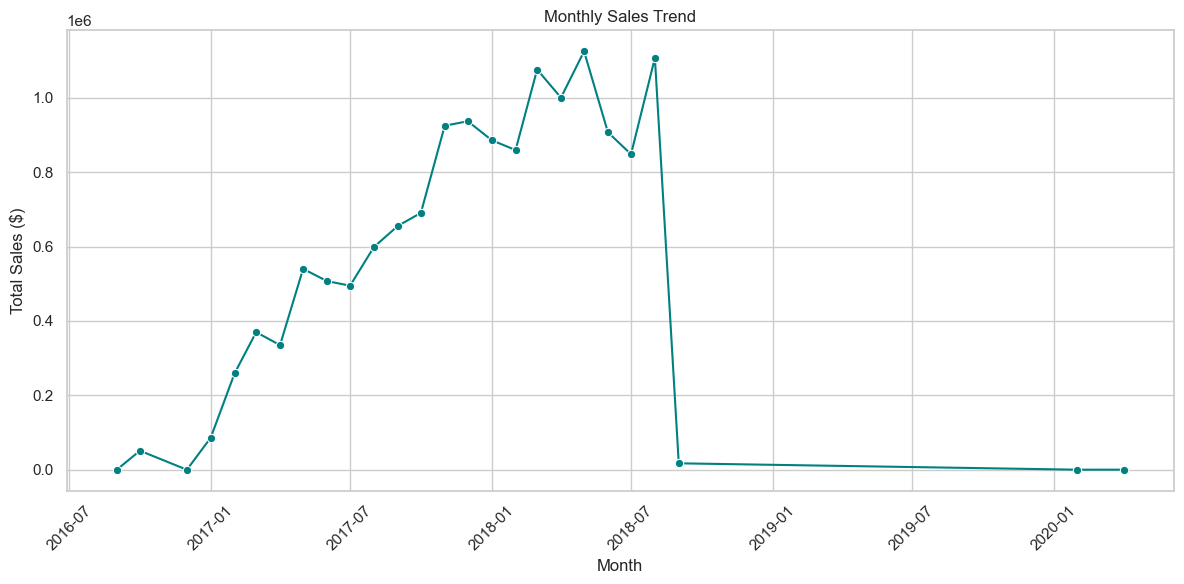

In [27]:
# 1: Analyze Sales Trends Over Time and Across Regions
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(42)

# Convert shipping_limit_date to datetime if not already done
orders_merged['shipping_limit_date'] = pd.to_datetime(orders_merged['shipping_limit_date'], errors='coerce')

# Create a new column for the order month (for monthly trend analysis)
orders_merged['order_month'] = orders_merged['shipping_limit_date'].dt.to_period('M').dt.to_timestamp()

# Aggregate monthly sales using the 'price' field
monthly_sales = orders_merged.groupby('order_month')['price'].sum().reset_index()

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='order_month', y='price', marker='o', color='teal')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Boss\AppData\Local\Temp\ipykernel_15432\1441607275.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x='customer_state', y='price', palette='viridis')


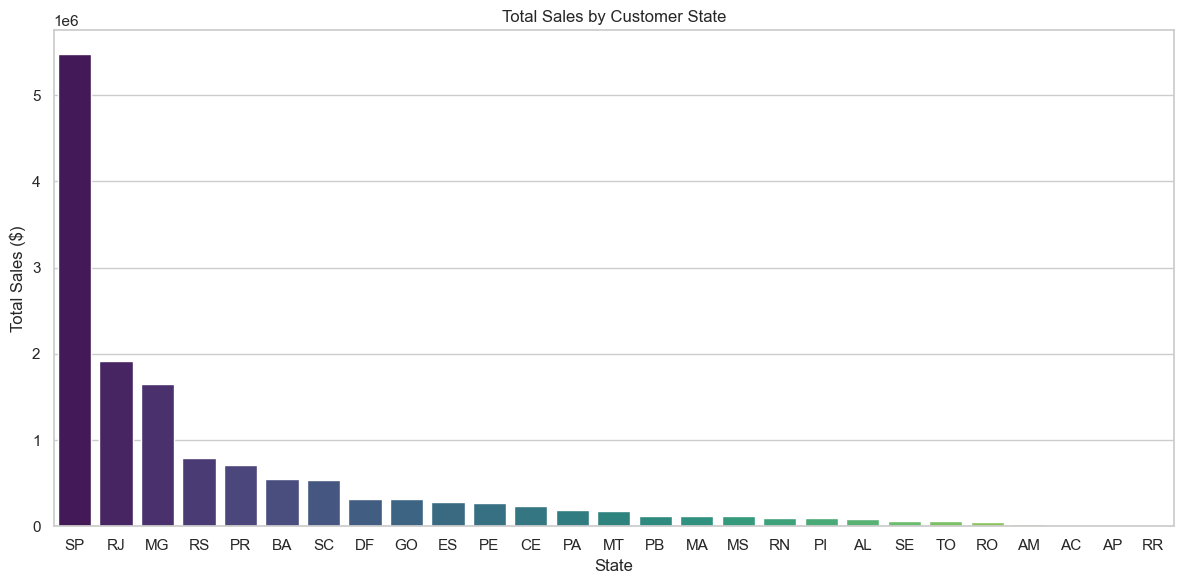

In [30]:
sns.set(style="whitegrid")
np.random.seed(42)
# Analyze sales by region using seller location
region_sales = orders_merged.groupby('customer_state')['price'].sum().reset_index()
# Sort descending by sales
region_sales = region_sales.sort_values('price', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=region_sales, x='customer_state', y='price', palette='viridis')
plt.title("Total Sales by Customer State")
plt.xlabel("State")
plt.ylabel("Total Sales ($)")
plt.tight_layout()
plt.show()

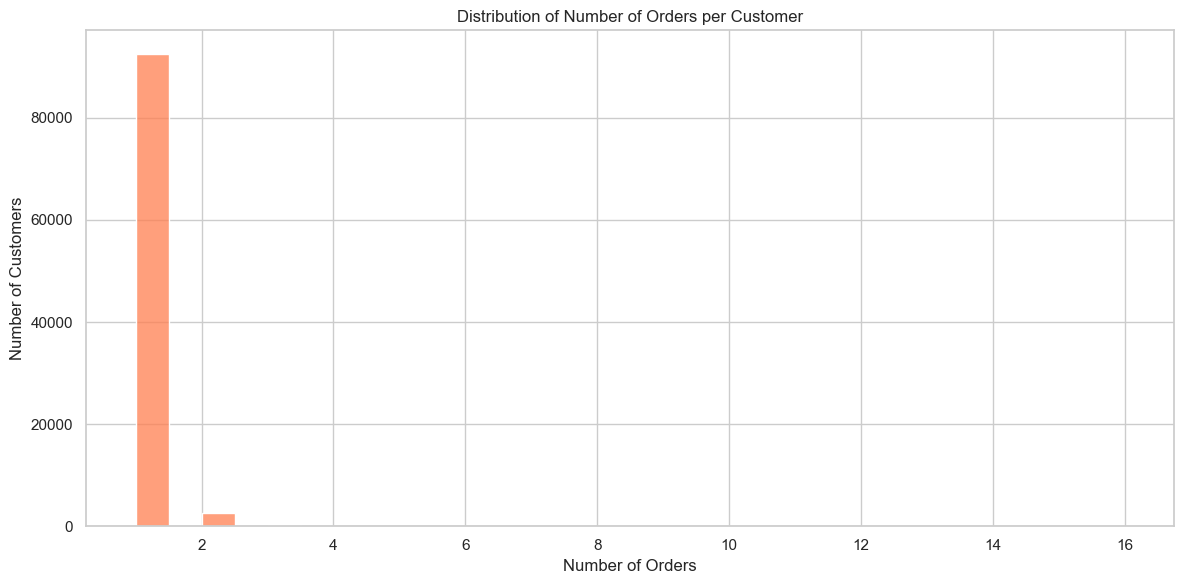

Summary of Purchase Frequency:
        order_count
count  95420.000000
mean       1.034018
std        0.211234
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       16.000000


In [32]:
# 2: Investigate Customer Behavior (Repeat Purchases and Review Scores)
sns.set(style="whitegrid")
np.random.seed(42)
# Investigate repeat purchases:
# Assuming the orders_merged DataFrame has a 'customer_unique_id' or 'customer_id'.
if 'customer_unique_id' in orders_merged.columns or 'customer_id' in orders_merged.columns:
    # Use whichever is available:
    customer_field = 'customer_unique_id' if 'customer_unique_id' in orders_merged.columns else 'customer_id'
    
    purchase_counts = orders_merged.groupby(customer_field)['order_id'].nunique().reset_index()
    purchase_counts.rename(columns={'order_id': 'order_count'}, inplace=True)

    plt.figure(figsize=(12, 6))
    sns.histplot(purchase_counts['order_count'], bins=30, color='coral', kde=False)
    plt.title("Distribution of Number of Orders per Customer")
    plt.xlabel("Number of Orders")
    plt.ylabel("Number of Customers")
    plt.tight_layout()
    plt.show()

    # Display statistics for repeat purchases
    print("Summary of Purchase Frequency:")
    print(purchase_counts.describe())
else:
    print("Customer identifier is not available for repeat purchase analysis.")

C:\Users\Boss\AppData\Local\Temp\ipykernel_15432\2116089903.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=orders_merged, x='review_score', palette='pastel')


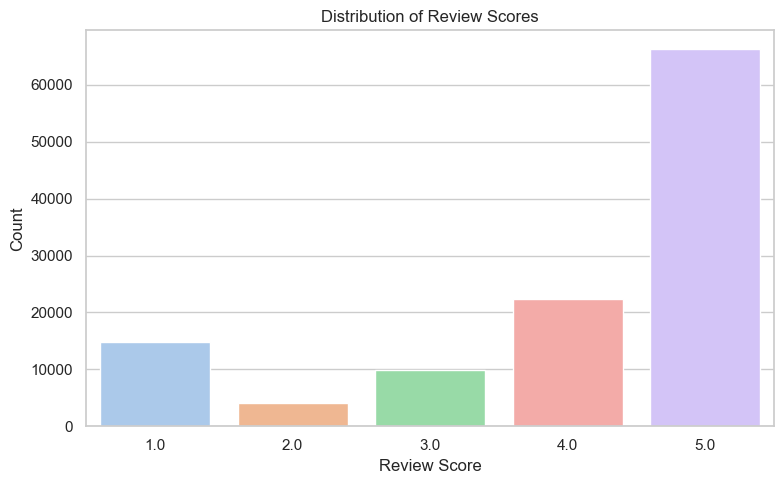

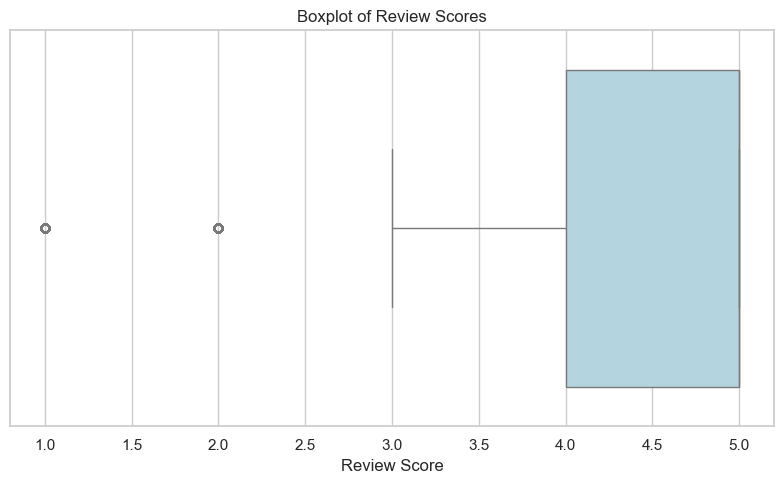

In [33]:
sns.set(style="whitegrid")
np.random.seed(42)
# Analyze review scores:
# Check the distribution of review scores from order reviews.
if 'review_score' in orders_merged.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=orders_merged, x='review_score', palette='pastel')
    plt.title("Distribution of Review Scores")
    plt.xlabel("Review Score")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    # Alternatively, a boxplot to identify any outliers:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=orders_merged, x='review_score', color='lightblue')
    plt.title("Boxplot of Review Scores")
    plt.xlabel("Review Score")
    plt.tight_layout()
    plt.show()
else:
    print("Review score information is not available in orders_merged.")


Top 10 Products by Sales Revenue:
                             product_id  total_sales  num_orders
24086  bb50f2e236e5eea0100680137654686c     68810.00         187
27613  d6160fb7873f184099d9bc95e30376af     56948.83          35
14068  6cdd53843498f92890544667809f1595     55779.90         151
27039  d1c427060a0f73f6b889a5c7c61f2ac4     49141.40         323
19742  99a4788cb24856965c36a24e339b6058     46575.66         467
4996   25c38557cf793876c5abdd5931f922db     44829.32          38
8051   3dd2a17168ec895c781a9191c1e95ad7     41682.20         255
22112  aca2eb7d00ea1a7b8ebd4e68314663af     38248.20         431
10867  53b36df67ebb7c41585e8d54d6772e08     38158.21         306
12351  5f504b3a1c75b73d6151be81eb05bdc9     37733.90          63


C:\Users\Boss\AppData\Local\Temp\ipykernel_15432\2847324030.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='product_id', y='total_sales', palette='Spectral')


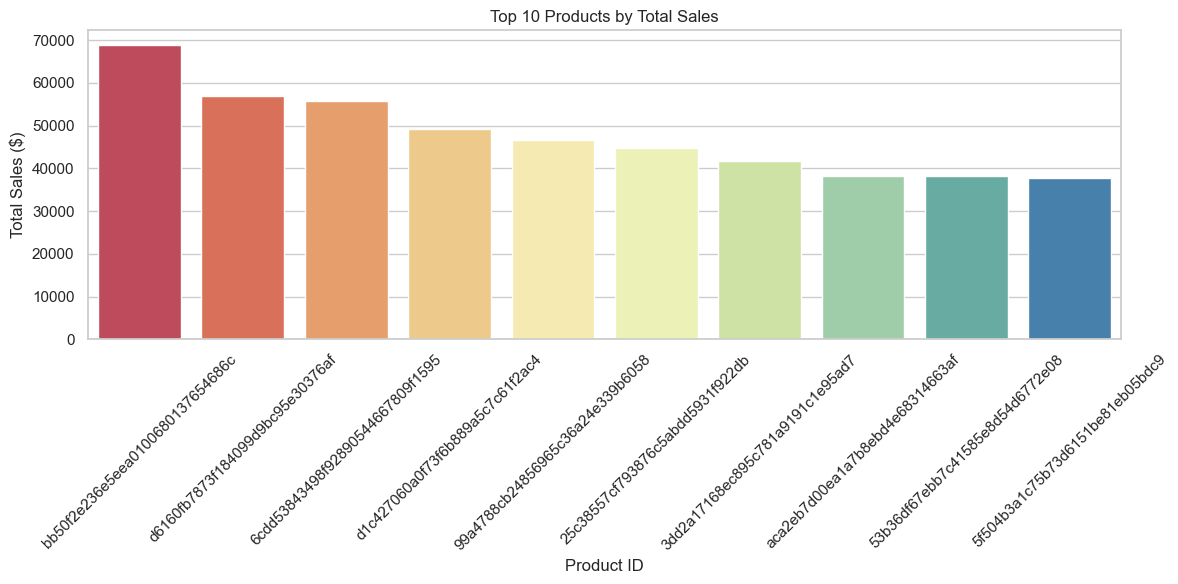

In [34]:
#3: Examine Product Performance and Category Popularity
# Product-level performance:
product_sales = orders_merged.groupby('product_id').agg(
    total_sales=('price', 'sum'),
    num_orders=('order_id', 'nunique')
).reset_index()

# Top 10 products by sales revenue
top_products = product_sales.sort_values('total_sales', ascending=False).head(10)
print("Top 10 Products by Sales Revenue:")
print(top_products)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='product_id', y='total_sales', palette='Spectral')
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Product ID")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Boss\AppData\Local\Temp\ipykernel_15432\93666246.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='product_category_name', y='total_sales', palette='magma')


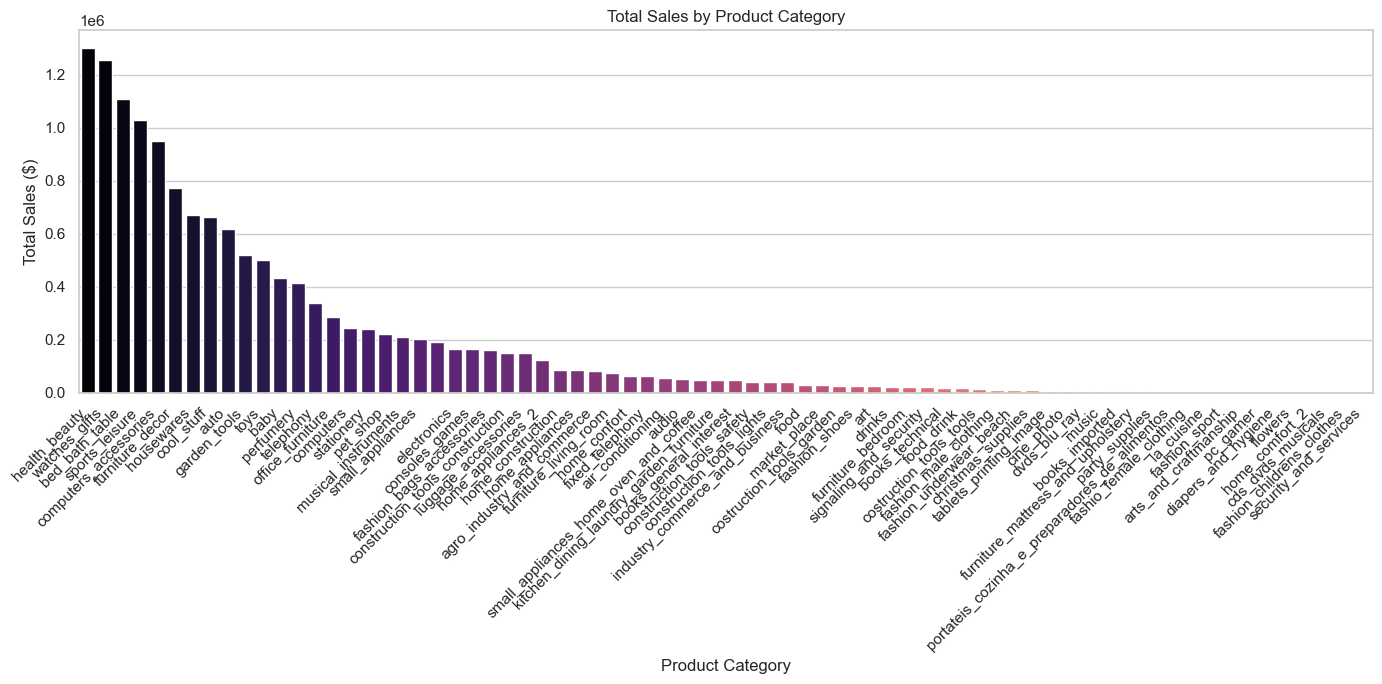

In [35]:
# Category popularity:
# Assuming the product information has a column for 'product_category_name' (translated to English).
if 'product_category_name' in orders_merged.columns:
    category_sales = orders_merged.groupby('product_category_name').agg(
        total_sales=('price', 'sum'),
        num_orders=('order_id', 'nunique')
    ).reset_index().sort_values('total_sales', ascending=False)

    plt.figure(figsize=(14, 7))
    sns.barplot(data=category_sales, x='product_category_name', y='total_sales', palette='magma')
    plt.title("Total Sales by Product Category")
    plt.xlabel("Product Category")
    plt.ylabel("Total Sales ($)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("Product category information is not available in orders_merged.")

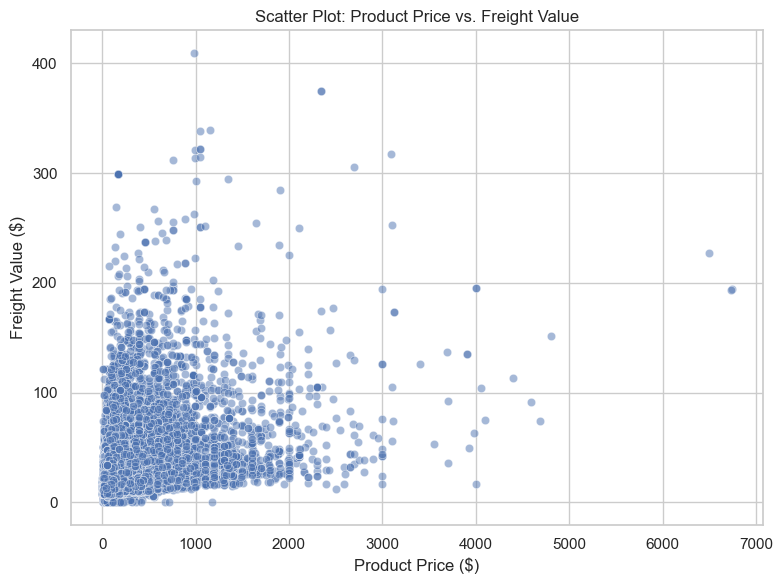

In [36]:
# 4: Additional Visualizations and Insights
# Scatter plot of price vs. freight_value to understand shipping cost effects
if 'freight_value' in orders_merged.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=orders_merged, x='price', y='freight_value', alpha=0.5)
    plt.title("Scatter Plot: Product Price vs. Freight Value")
    plt.xlabel("Product Price ($)")
    plt.ylabel("Freight Value ($)")
    plt.tight_layout()
    plt.show()

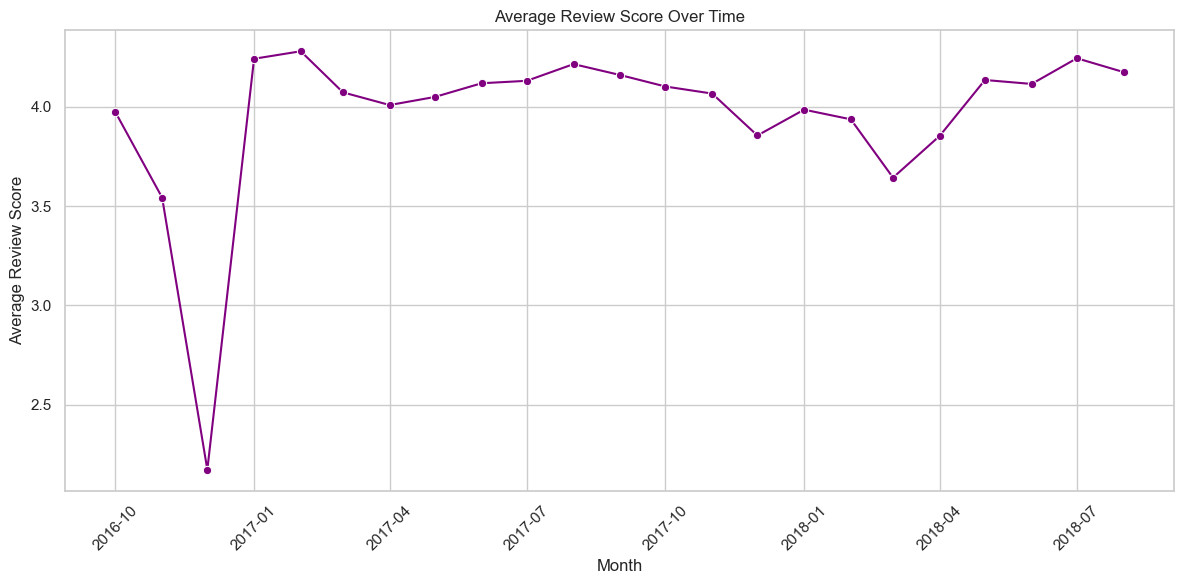

In [37]:
# Time series of review scores over time:
if 'review_creation_date' in orders_merged.columns and 'review_score' in orders_merged.columns:
    review_time = orders_merged.dropna(subset=['review_creation_date']).copy()
    review_time['review_month'] = review_time['review_creation_date'].dt.to_period('M').dt.to_timestamp()
    monthly_reviews = review_time.groupby('review_month')['review_score'].mean().reset_index()
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_reviews, x='review_month', y='review_score', marker='o', color='purple')
    plt.title("Average Review Score Over Time")
    plt.xlabel("Month")
    plt.ylabel("Average Review Score")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Operational Analysis:
Evaluate delivery performance and freight costs.
Assess payment methods and their impact on sales.
Analyze seller performance and customer satisfaction.

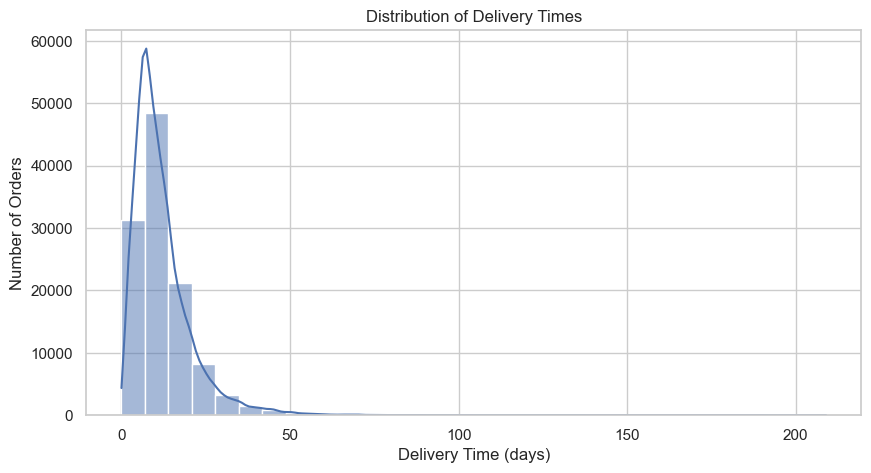

In [42]:
# Create delivery time column
orders_merged['delivery_time_days'] = (orders_merged['order_delivered_customer_date'] - orders_merged['order_purchase_timestamp']).dt.days

# Plot delivery time distribution
plt.figure(figsize=(10, 5))
sns.histplot(orders_merged['delivery_time_days'].dropna(), bins=30, kde=True)
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Number of Orders')
plt.show()

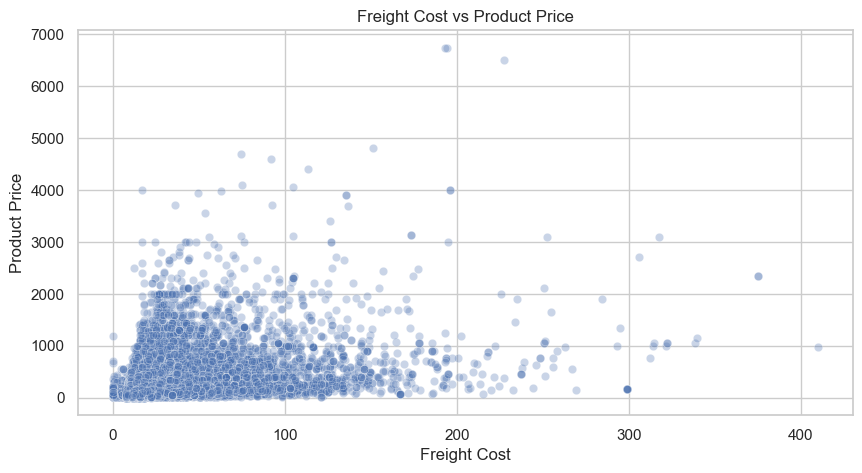

In [43]:
# Freight cost vs price
plt.figure(figsize=(10, 5))
sns.scatterplot(data=orders_merged, x='freight_value', y='price', alpha=0.3)
plt.title('Freight Cost vs Product Price')
plt.xlabel('Freight Cost')
plt.ylabel('Product Price')
plt.show()

  payment_type  total_sales  avg_payment  num_orders
0       boleto   4083687.96   177.412806       23018
1  credit_card  15669475.07   179.576372       87258
2   debit_card    254490.83   149.788599        1699
3      voucher    409188.68    64.622344        6332


C:\Users\Boss\AppData\Local\Temp\ipykernel_15432\3074556148.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_summary, x='payment_type', y='total_sales', palette='Set2')


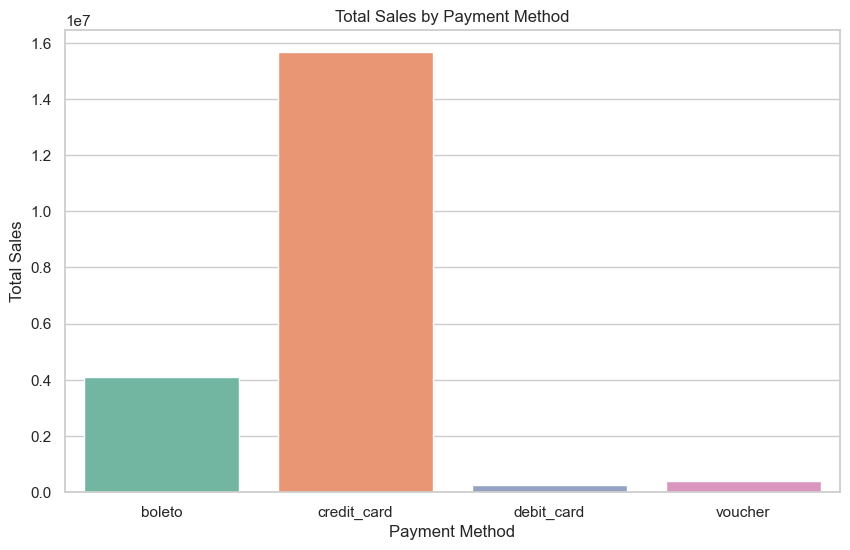

In [46]:
# Group by payment type and analyze totals
payment_summary = orders_merged.groupby('payment_type').agg(
    total_sales=('payment_value', 'sum'),
    avg_payment=('payment_value', 'mean'),
    num_orders=('order_id', 'count')
).reset_index()

print(payment_summary)

# Visualize payment methods
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_summary, x='payment_type', y='total_sales', palette='Set2')
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.show()


C:\Users\Boss\AppData\Local\Temp\ipykernel_15432\353909407.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sellers, x='seller_id', y='avg_review_score', palette='coolwarm')


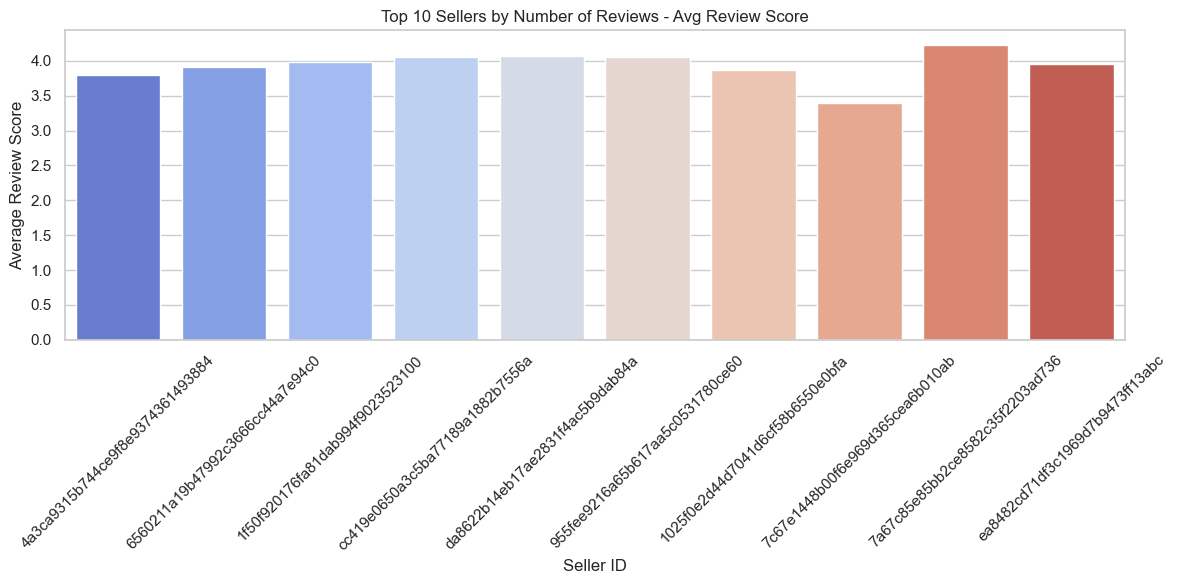

In [47]:
# Average review score per seller
seller_reviews = orders_merged.groupby('seller_id')['review_score'].agg(['count', 'mean']).reset_index()
seller_reviews.columns = ['seller_id', 'num_reviews', 'avg_review_score']

# Top 10 sellers by number of reviews
top_sellers = seller_reviews.sort_values(by='num_reviews', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_sellers, x='seller_id', y='avg_review_score', palette='coolwarm')
plt.title('Top 10 Sellers by Number of Reviews - Avg Review Score')
plt.xticks(rotation=45)
plt.xlabel('Seller ID')
plt.ylabel('Average Review Score')
plt.tight_layout()
plt.show()


# Business Insights and Recommendations:
Identify factors influencing customer satisfaction and retention.
Suggest strategies to improve sales and operational efficiency.
Highlight areas for potential growth and optimization.

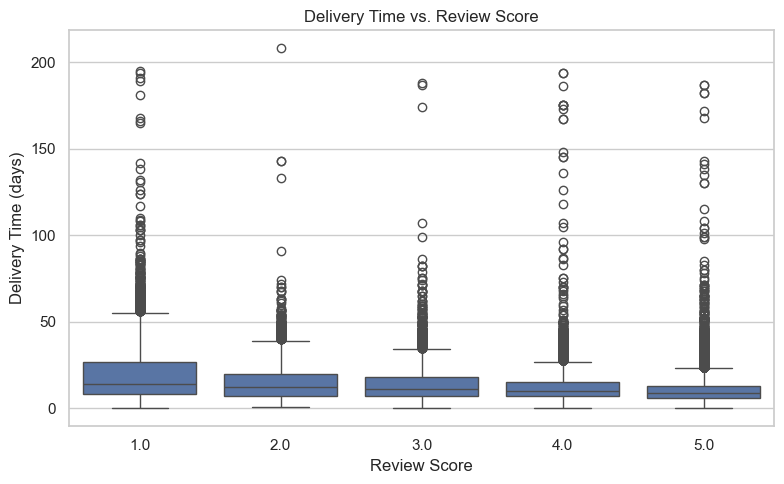

In [48]:
# Correlation between delivery time and review score

plt.figure(figsize=(8, 5))
sns.boxplot(data=orders_merged, x='review_score', y='delivery_time_days')
plt.title('Delivery Time vs. Review Score')
plt.xlabel('Review Score')
plt.ylabel('Delivery Time (days)')
plt.tight_layout()
plt.show()

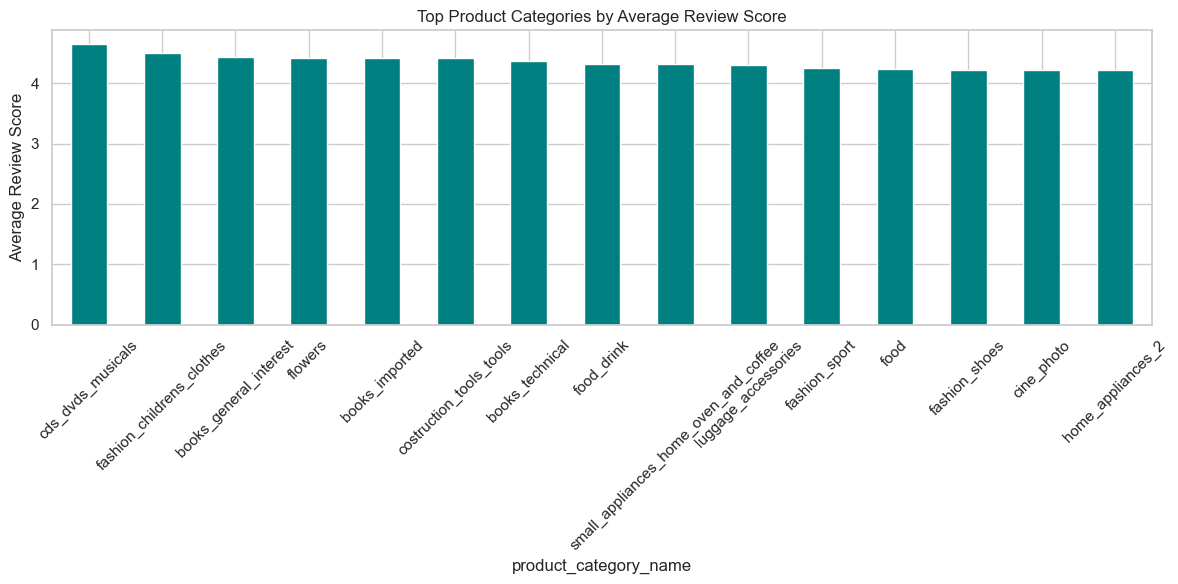

In [49]:
# Average review scores per product category
category_reviews = orders_merged.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_reviews.head(15).plot(kind='bar', color='teal')
plt.title('Top Product Categories by Average Review Score')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


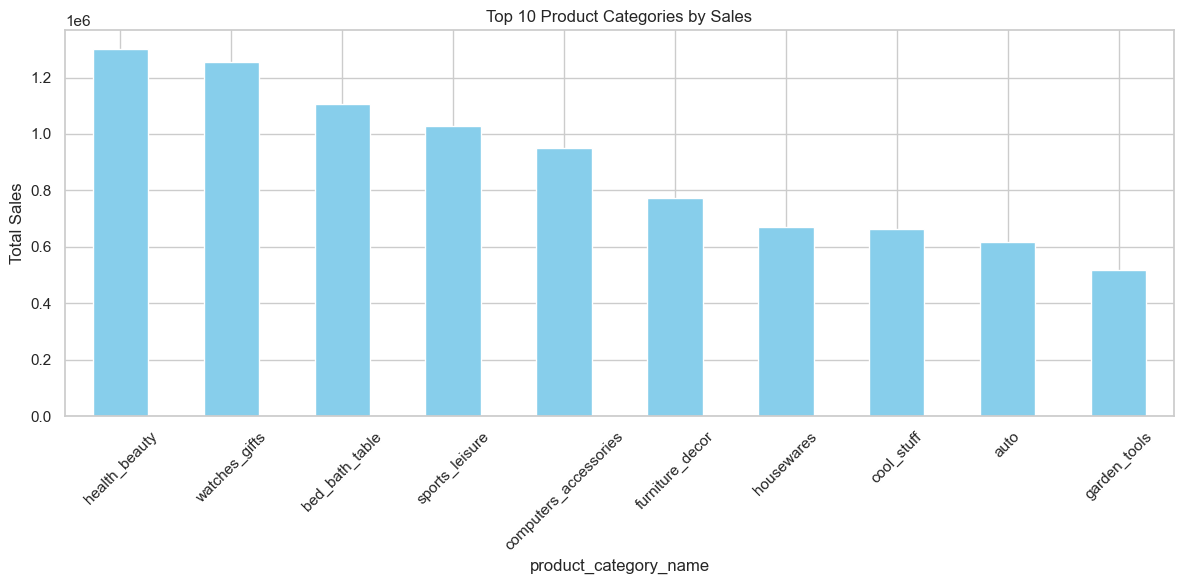

In [50]:
# Top product categories by sales
category_sales = orders_merged.groupby('product_category_name')['price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Categories by Sales')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


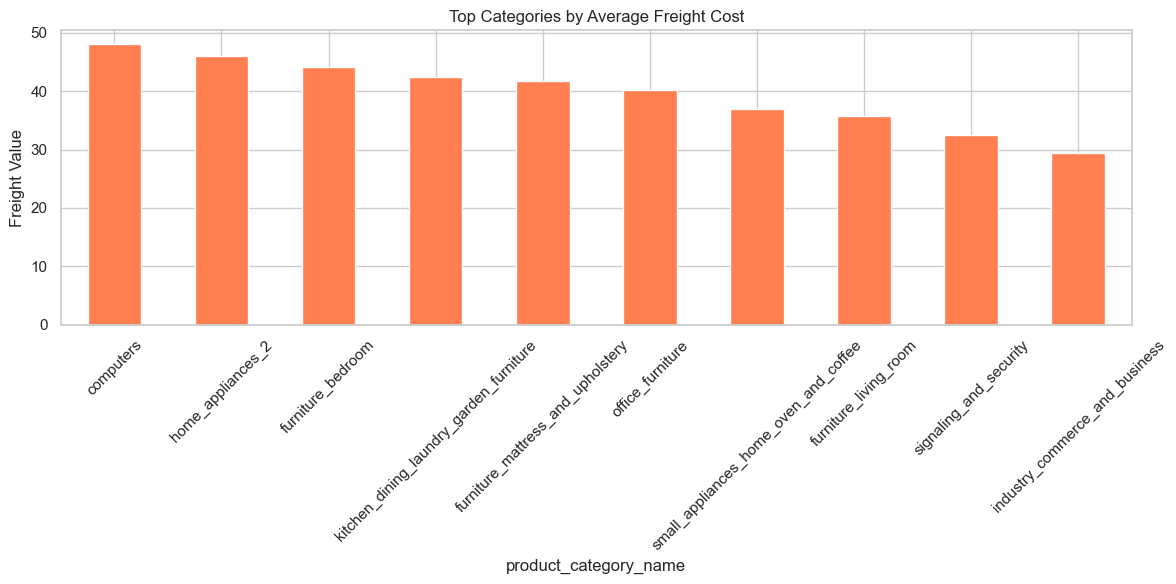

In [51]:
# Average freight cost per product category
freight_by_category = orders_merged.groupby('product_category_name')['freight_value'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
freight_by_category.head(10).plot(kind='bar', color='coral')
plt.title('Top Categories by Average Freight Cost')
plt.ylabel('Freight Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

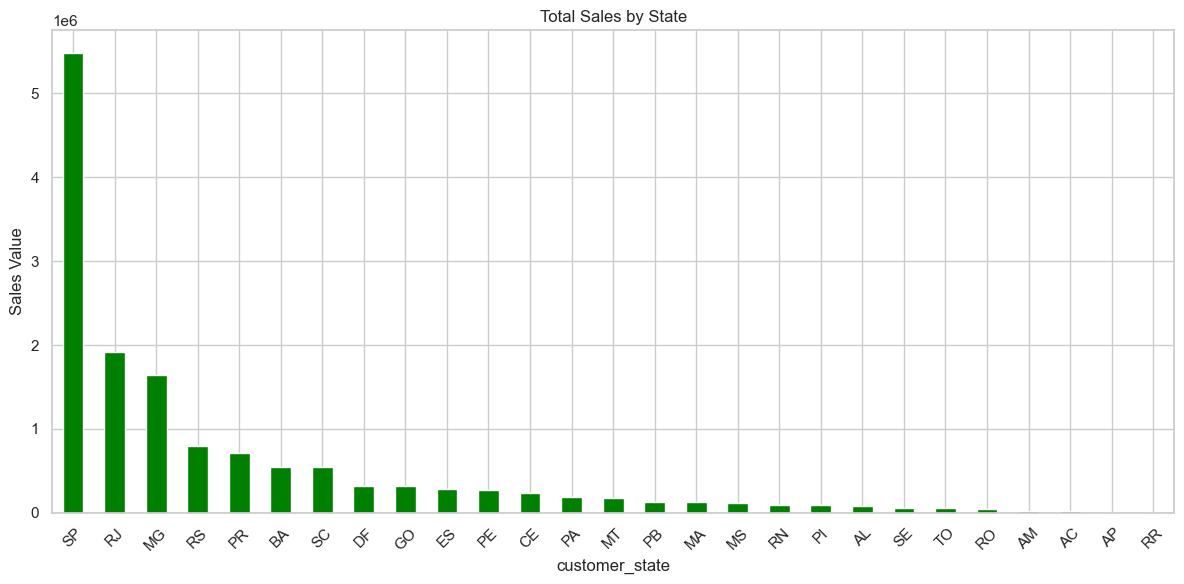

In [52]:
# Regional performance
state_sales = orders_merged.groupby('customer_state')['price'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
state_sales.plot(kind='bar', color='green')
plt.title('Total Sales by State')
plt.ylabel('Sales Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
# 1. Prepare target
orders_merged['review_score_binary'] = orders_merged['review_score'].apply(lambda x: 1 if x >= 4 else 0)

# 2. Select features
features = [
    'price', 'freight_value', 'payment_type', 'payment_installments',
    'delivery_time_days', 'product_category_name', 'product_photos_qty',
    'product_description_lenght', 'customer_state', 'seller_state'
]
data = orders_merged[features + ['review_score_binary']].dropna()

In [55]:
data.head(3)

,price,freight_value,payment_type,payment_installments,delivery_time_days,product_category_name,product_photos_qty,product_description_lenght,customer_state,seller_state,review_score_binary
0,58.9,13.29,credit_card,2.0,7.0,cool_stuff,4.0,598.0,RJ,SP,1
1,239.9,19.93,credit_card,3.0,16.0,pet_shop,2.0,239.0,SP,SP,1
2,199.0,17.87,credit_card,5.0,7.0,furniture_decor,2.0,695.0,MG,MG,1


In [56]:
# 3. Encode categoricals
categorical_cols = ['payment_type', 'product_category_name', 'customer_state', 'seller_state']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# 4. Scale numerical features
scaler = StandardScaler()
numerical_cols = ['price', 'freight_value', 'payment_installments', 'delivery_time_days',
                  'product_photos_qty', 'product_description_lenght']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [57]:
# 5. Split data
X = data.drop('review_score_binary', axis=1)
y = data['review_score_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 7. Predict & Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.43      0.55      5460
           1       0.85      0.96      0.90     17684

    accuracy                           0.84     23144
   macro avg       0.81      0.70      0.73     23144
weighted avg       0.83      0.84      0.82     23144

Confusion Matrix:
 [[ 2351  3109]
 [  697 16987]]


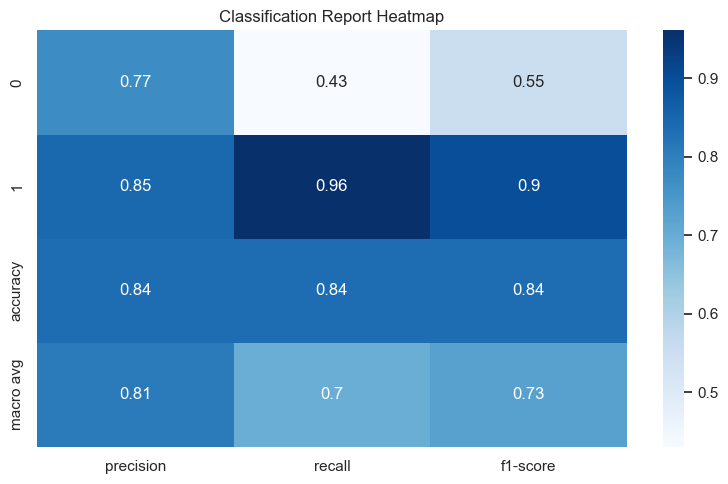

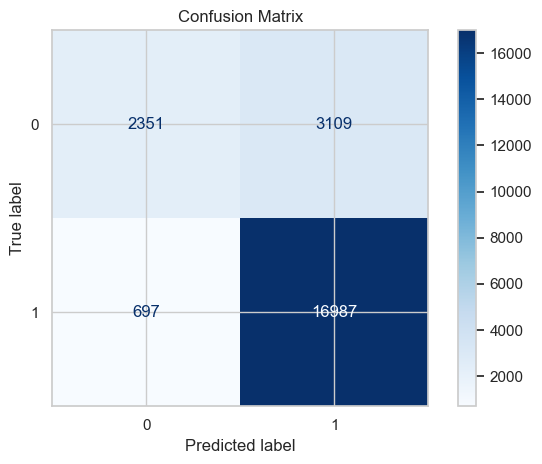

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.tight_layout()
plt.show()

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [59]:
import joblib

# Save the model
joblib.dump(clf, 'review_score_classifier.pkl')

# Save encoders and scaler
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')

['feature_scaler.pkl']